In [1]:
%%capture
from keras.datasets import mnist

In [2]:
(train_images, train_labels),(test_images, test_labels) = mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


In [3]:
type(train_images)

numpy.ndarray

In [4]:
train_images.dtype

dtype('uint8')

In [5]:
train_images.ndim

3

In [6]:
train_images.shape

(60000, 28, 28)

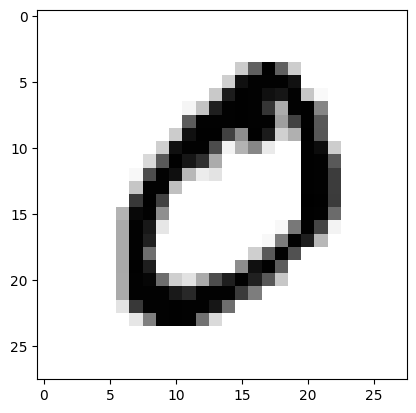

In [7]:
import matplotlib.pyplot as plt
plt.imshow(train_images[1,:,:], cmap = plt.cm.binary)
plt.show()

In [8]:
type(train_labels)

numpy.ndarray

In [9]:
train_labels.shape

(60000,)

In [10]:
train_labels[1]

0

In [11]:
type(test_images)

numpy.ndarray

In [12]:
test_images.shape

(10000, 28, 28)

In [13]:
test_images.ndim

3

In [14]:
test_labels.shape

(10000,)

In [15]:
train_images = train_images.reshape((60000,28*28))
train_images = train_images.astype("float32")/255

In [16]:
test_images = test_images.reshape((10000,28*28))
test_images = test_images.astype("float32")/255

In [17]:
train_images.shape

(60000, 784)

In [18]:
test_images.shape

(10000, 784)

In [19]:
from keras.utils import to_categorical
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [20]:
from keras import models
from keras import layers

In [21]:
model = models.Sequential()

In [22]:
model.add(layers.Dense(512, activation = "relu", input_shape = (28*28, )))
model.add(layers.Dense(10, activation = "softmax"))

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [24]:
model.compile(optimizer= "rmsprop",
             loss = "categorical_crossentropy",
             metrics = ["accuracy"])

In [25]:
model.fit(train_images,
         train_labels,
         epochs = 5,
         batch_size = 128)

Epoch 1/5
469/469 [==============================] - 4s 7ms/step - loss: 0.2669 - accuracy: 0.9223
Epoch 2/5
469/469 [==============================] - 3s 7ms/step - loss: 0.1073 - accuracy: 0.9686
Epoch 3/5
469/469 [==============================] - 3s 7ms/step - loss: 0.0705 - accuracy: 0.9793
Epoch 4/5
469/469 [==============================] - 3s 7ms/step - loss: 0.0501 - accuracy: 0.9854
Epoch 5/5
469/469 [==============================] - 3s 7ms/step - loss: 0.0379 - accuracy: 0.9886


In [26]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print("test_loss : ", test_loss,"\ntest_acc : ", test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.0584 - accuracy: 0.9819
test_loss :  0.05837473273277283 
test_acc :  0.9818999767303467
